In [1]:
import tonic
import tonic.transforms as transforms
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from data_loader import SamplesDataLoader



root_dir = "/media/jskupien/SanDisk2/neurohack"

/home/jskupien/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
transform_queue = transforms.Compose([
    transforms.CenterCrop(sensor_size=(1280,720,2), size = (720,720)),
    transforms.Downsample(spatial_factor=256/720),
    transforms.ToTimesurface(dt=10000,tau=10000,sensor_size=(256,256,2))
])

data_loader = SamplesDataLoader(root_dir = root_dir, dataset_type="synthetic", transform = transform_queue)
sample_events, sample_label = data_loader[0]

In [9]:
print(sample_events.shape)

(60, 2, 256, 256)


##### Test of Frame event distribution

In [ ]:
# Check the distribution of the labels
all_transforms = transforms.Compose([
    # no transforms
])
data_loader = SamplesDataLoader(root_dir = root_dir, dataset_type="synthetic", transform = all_transforms)
sample_events, sample_label = data_loader[0]
print("events loaded")

boundries = [280, 1000, 1280]
sample_events_x = np.array([smpl[1] for smpl in sample_events])
print("x values extracted")


events loaded
x values extracted


In [ ]:
print(np.max(sample_events_x))

1276


In [ ]:
fig, axs = plt.subplots(len(data_loader), 2, figsize=(12, 8))

for sample in data_loader:
    sample_events, sample_label = sample
    sample_events_x = np.array([smpl[1] for smpl in sample_events])
    # only three bins
    event_distribution = np.digitize(sample_events_x, boundries, right=True)
    axs[0].hist(event_distribution, bins=3)
    print("bin histogram plotted")
    # bin for each pixel
    event_distribution = np.bincount(sample_events_x, minlength=1280)
    axs[1].plot(np.linspace(0, 1280, 1280), event_distribution)
    print("pixel histogram plotted")
    # del sample_events

    plt.tight_layout()
    plt.show()

bin histogram plotted


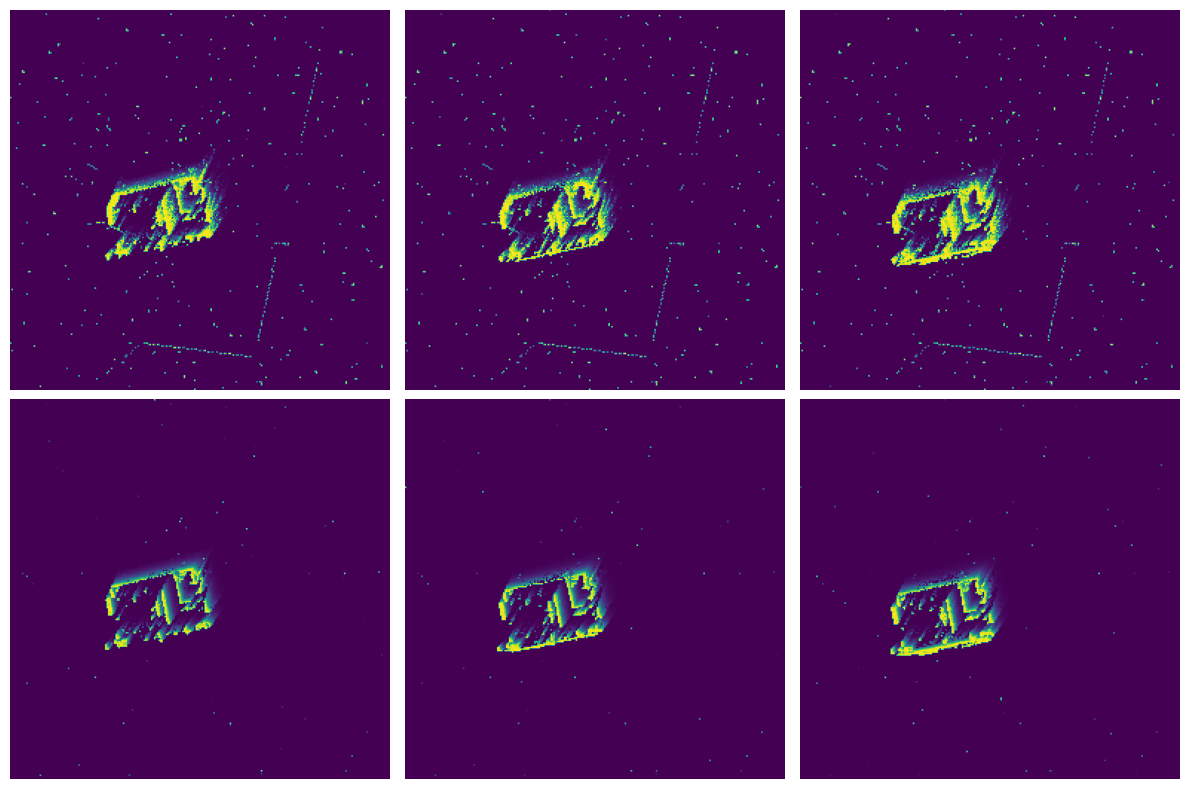

In [ ]:
def visualize_surfaces(surfaces):
    n_surfaces = surfaces.shape[0]
    n_channels = surfaces.shape[1]
    fig, axs = plt.subplots(n_channels, n_surfaces, figsize=(12, 8))
    index = 0
    for i in range(n_surfaces):
        for j in range(n_channels):
            row = index % n_channels
            col = index // n_channels 
            axs[row, col].imshow(surfaces[i, j])
            axs[row, col].axis('off')
            index += 1
    plt.tight_layout()
    plt.show()

visualize_surfaces(sample_events[40:43])